# Machine Learning - (Supervised Learning)
## Uso: PREVER a espécie de uma flor Iris a partir da informação da altura e largura de suas pétalas e sépalas.

Iris é um gênero de plantas popularmente conhecidas como lírios. São classificadas em três espécies:
* Setosa
* Versicolor
* Virgínica

Para a classificação das flores Iris utilizaremos as seguintes caractéristicas:
* Altura e Largura da sépala
* Altura e Largura da pétala

Estas são as informações contidas no Dataset e também as que são utilizadas como Input para fazer a predição.

## Dataset: Iris Dataset - [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)
## Algorítimo: CLASSIFICAÇÃO KNN

O algoritmo KNN (k-vizinhos mais próximos) é um método não-paramétrico utilizado para a classificação e regressão. Em ambos os casos, a entrada consiste em calcular a distância entre os k exemplos de treinamento mais próximos.

Na classificação com o k-NN, a saída é uma associação com uma classe. Um objeto é classificado pela votação majoritária da classe dos vizinhos, sendo o objeto atribuído à classe mais comum dentre seus k vizinhos mais próximos.

Utilizado o classificador KNN da biblioteca Scikit-Learn


### Importação das Bibliotecas

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib

%matplotlib inline

### Carregando o Dataset

In [24]:
df = pd.read_csv ("iris.csv")

### Visualizando os dados importados

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VIRGINICA
146,6.3,2.5,5.0,1.9,VIRGINICA
147,6.5,3.0,5.2,2.0,VIRGINICA
148,6.2,3.4,5.4,2.3,VIRGINICA


### Visualizando um resumo dos dados importados 

In [26]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exibindo gráfico da DISPERSÃO dos dados

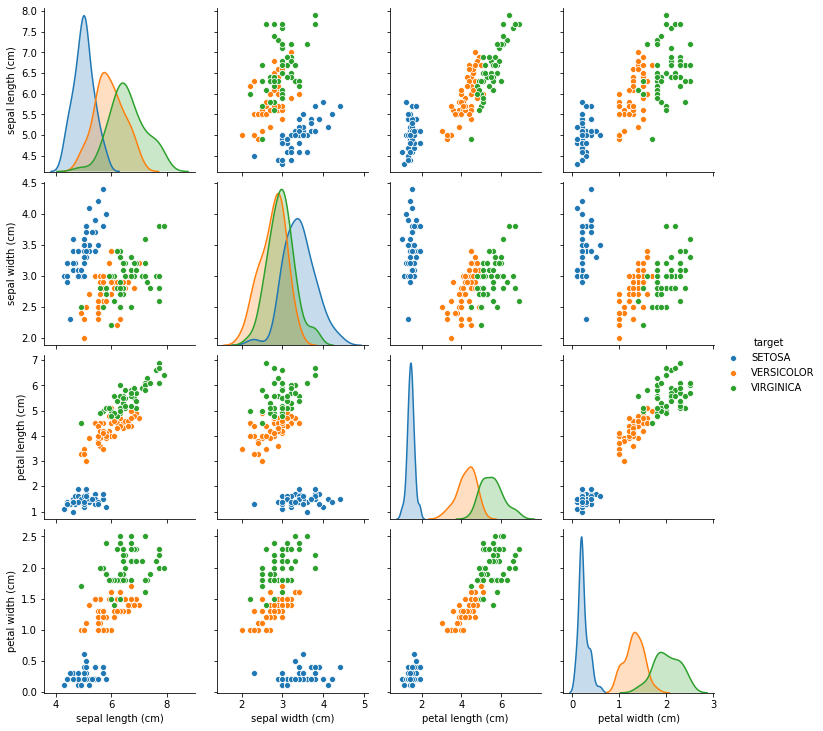

In [27]:
sb.pairplot(df,hue="target")

### Criando um array com as caracteríscas/features que serão utilizadas para classificação. 
#### (Altura e Largura das sépalas e pétalas)

In [28]:
x = np.array(df.drop("target",1))  ##todas as colunas do arquivo .CSV exceto a coluna "target"

### Criando um array com as Classes para classificação 
#### (Rótulo dos dados)

In [29]:
y = np.array(df.target) ##somente a coluna "target"

### Criando um classificador (k = 3 vizinhos próximos )

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

### Treinando o algorítimo utilizando as "Features" e "Rótulos"

In [31]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Salvando o modelo Treinado

In [32]:
joblib.dump(knn, 'iris_modelo_treinado.pkl')

['iris_modelo_treinado.pkl']

### Importando o modelo Treinado

In [33]:
knn2 = joblib.load('iris_modelo_treinado.pkl')
knn2.classes_

array(['SETOSA', 'VERSICOLOR', 'VIRGINICA'], dtype=object)

# Conclusão - Predição com base em modelo treinado

### Input: Array com informações da flor iris que se deseja predizer a espécie 
#### (Altura e Largura das sépalas e pétalas)

In [38]:
nova_flor = [4.2,3.1,2.1,0.9]

### Predição com base em novo Input

In [39]:
knn2.predict([nova_flor])

array(['SETOSA'], dtype=object)